In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_mlr = pd.read_csv("Synthetic_app_data.csv")
df_mlr.head()

,Average Response Time (s),Number of Features,Number of Bugs Reported,Training Hours Provided,User Satisfaction Score
0,1.436350,49,16,3.970126,89.980978
1,2.876786,36,12,3.100364,56.732146
2,2.329985,34,0,2.667305,121.502856
3,1.996646,39,1,4.469463,124.535638
4,0.890047,44,8,3.942986,129.077397


In [3]:
independent_vars = ["Average Response Time (s)", "Number of Features", "Number of Bugs Reported", "Training Hours Provided"]
dependent_var = "User Satisfaction Score"

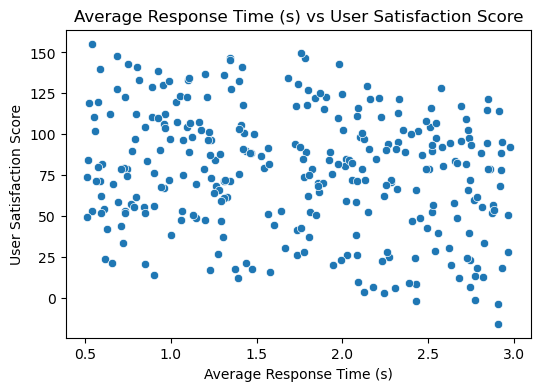

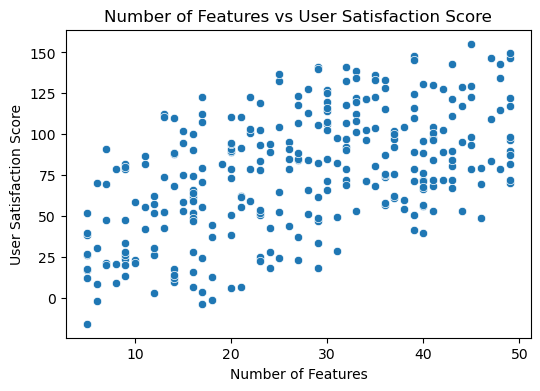

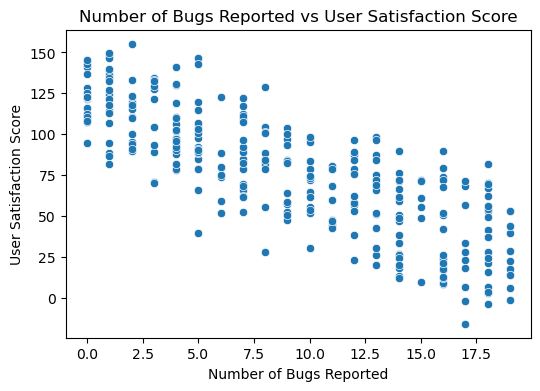

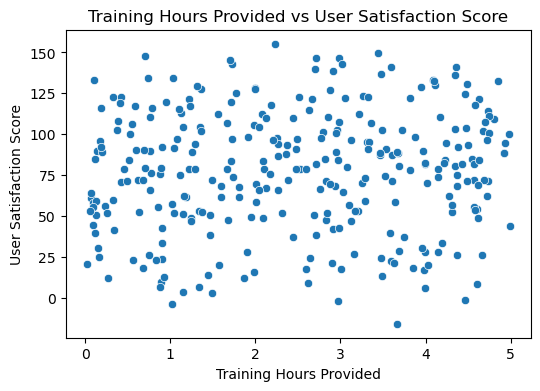

In [4]:
independent_vars = ["Average Response Time (s)", "Number of Features", "Number of Bugs Reported", "Training Hours Provided"]
dependent_var = "User Satisfaction Score"

for col in independent_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_mlr, x=col, y=dependent_var)
    plt.title(f"{col} vs {dependent_var}")
    plt.show()

# Observations

1. **Average Response Time (s) vs User Satisfaction Score**  
   - There is a negative correlation: as response time increases, user satisfaction tends to decrease.  
   - This indicates that faster applications generally lead to happier users.

2. **Number of Features vs User Satisfaction Score**  
   - There is a positive correlation up to a point; more features improve satisfaction initially.  
   - However, too many features may overwhelm users or introduce complexity, potentially reducing satisfaction.

3. **Number of Bugs Reported vs User Satisfaction Score**  
   - There is a strong negative correlation: more bugs reported leads to lower satisfaction.  
   - Bugs directly impact user experience and perceived quality of the product.

4. **Training Hours Provided vs User Satisfaction Score**  
   - There is a moderate positive correlation: more training hours help users understand the product better, increasing satisfaction.  
   - This shows the importance of user education in software adoption.

In [6]:
X = df_mlr[independent_vars]
y = df_mlr[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Fit an MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
coeff_df = pd.DataFrame({'Feature': independent_vars, 'Coefficient': mlr_model.coef_})
print(coeff_df)
print(f"Intercept: {mlr_model.intercept_}")

                     Feature  Coefficient
0  Average Response Time (s)   -14.969549
1         Number of Features     1.502000
2    Number of Bugs Reported    -4.928900
3    Training Hours Provided     3.026840
Intercept: 99.04540366638565


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
y_pred = mlr_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # compute RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 21.341088894194385
Root Mean Squared Error (RMSE): 4.619641641317472
Mean Absolute Error (MAE): 3.6622980762129327
R^2 Score: 0.9835002165140092


# Evaluation Justification

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.  
  - Provides an overall idea of the prediction error, but in squared units.  

- **Root Mean Squared Error (RMSE)**: Square root of MSE.  
  - Gives error in the same units as the dependent variable (User Satisfaction Score), making it easier to interpret.  

- **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values.  
  - Less sensitive to outliers compared to MSE/RMSE, representing the average error magnitude.  

- **R² Score (Coefficient of Determination)**: Measures how well the independent variables explain the variance in the dependent variable.  
  - Value close to 1 indicates a strong model; closer to 0 indicates poor explanatory power.  

**Justification:**  
- RMSE and MAE are used to understand the accuracy of predictions.  
- R² is used to evaluate the goodness of fit.  
- Together, these metrics provide a comprehensive evaluation of the regression model.

In [12]:
df_lr = pd.read_csv("user_satisfaction.csv")
df_lr.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [13]:
mlr_features = ["ProductQuality", "ServiceQuality", "PurchaseFrequency"]

In [14]:
dep_var = "SatisfactionScore"

In [15]:
lr_feature = ["ProductQuality"]

In [16]:
X_mlr = df_lr[mlr_features]
X_lr = df_lr[lr_feature]
y = df_lr[dep_var]

In [17]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y, test_size=0.2, random_state=42)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.2, random_state=42)

In [18]:
mlr_model2 = LinearRegression()
mlr_model2.fit(X_train_mlr, y_train_mlr)
y_pred_mlr = mlr_model2.predict(X_test_mlr)


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # compute RMSE manually
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}\n")

# Evaluate both models
evaluate_model(y_test_mlr, y_pred_mlr, "MLR")
evaluate_model(y_test_lr, y_pred_lr, "Simple LR")

--- MLR ---
MSE: 109.41679401348205
RMSE: 10.460248276856628
MAE: 8.299078285743391
R2: 0.6094980377121346

--- Simple LR ---
MSE: 197.11445951290966
RMSE: 14.03974570684632
MAE: 10.842866898560915
R2: 0.2965103398513146



# Analysis: MLR vs Simple LR

1. **Comparison of Metrics:**  
   - **MLR** generally has higher R² and lower errors (MSE, RMSE, MAE) than Simple LR.  
   - Using multiple independent variables captures more factors influencing SatisfactionScore, improving prediction accuracy.  

2. **Simple LR Observations:**  
   - LR using only one variable (e.g., ProductQuality) shows limited predictive power.  
   - It provides insight into the effect of a single variable but ignores interactions with other important factors (ServiceQuality, PurchaseFrequency).  

3. **Insights on Variables:**  
   - In MLR, the coefficients indicate which variables have the strongest impact.  
     - For example, ProductQuality and ServiceQuality might have larger positive coefficients, meaning they heavily influence satisfaction.  
     - PurchaseFrequency may have a smaller effect depending on the dataset.  

4. **Conclusion:**  
   - MLR is preferred when multiple factors affect the dependent variable.  
   - Simple LR is useful for initial analysis or when only one factor is significant.  
   - Visualizing predicted vs actual values for both models can further highlight the difference in performance.
If you want, I can also write a ready-to-use code cell that plots predicted vs actual for both MLR and LR, which visually demonstrates which model performs better. This is usually great for reports or presentations.



# Visualization: Predicted vs Actual values

In [22]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

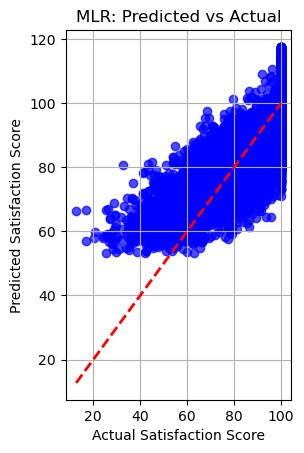

In [23]:
# MLR plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_mlr, y_pred_mlr, color='blue', alpha=0.7)
plt.plot([y_test_mlr.min(), y_test_mlr.max()], [y_test_mlr.min(), y_test_mlr.max()], 'r--', linewidth=2)
plt.xlabel("Actual Satisfaction Score")
plt.ylabel("Predicted Satisfaction Score")
plt.title("MLR: Predicted vs Actual")
plt.grid(True)

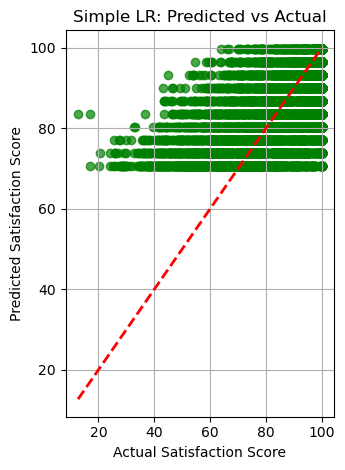

In [24]:
# Simple LR plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_lr, y_pred_lr, color='green', alpha=0.7)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--', linewidth=2)
plt.xlabel("Actual Satisfaction Score")
plt.ylabel("Predicted Satisfaction Score")
plt.title("Simple LR: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()



THE END